<h1 style="text-align: center;">Deep Learning (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
sns.set()

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12,8)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)

In [5]:
df1 = pd.read_csv('Churn_Modelling.csv')
df = df1.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.shape

(10000, 14)

In [7]:
#check is there is missing data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
#describe the non-numerical data
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


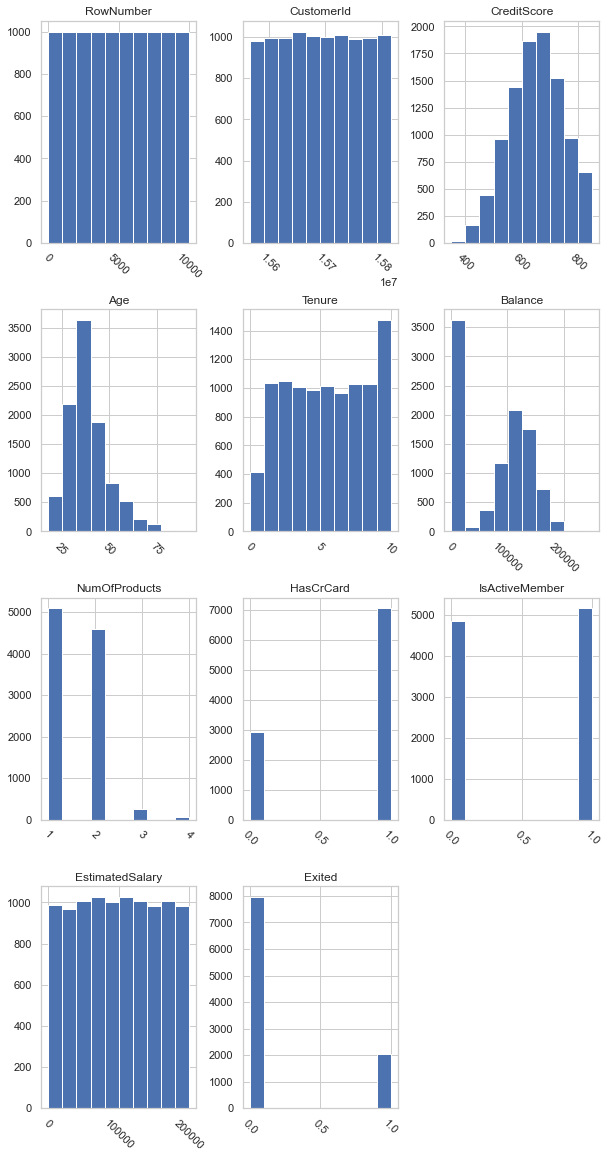

In [10]:
df.hist(figsize=(10,20), xrot=-45)
plt.show()

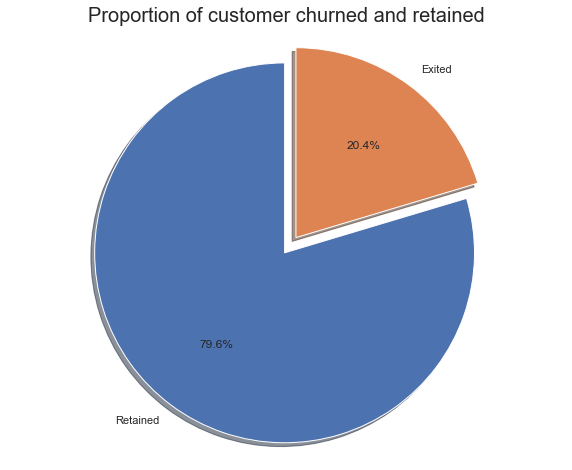

In [11]:
labels =  'Retained','Exited'
sizes = [ df.Exited[df['Exited']==0].count(),df.Exited[df['Exited']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

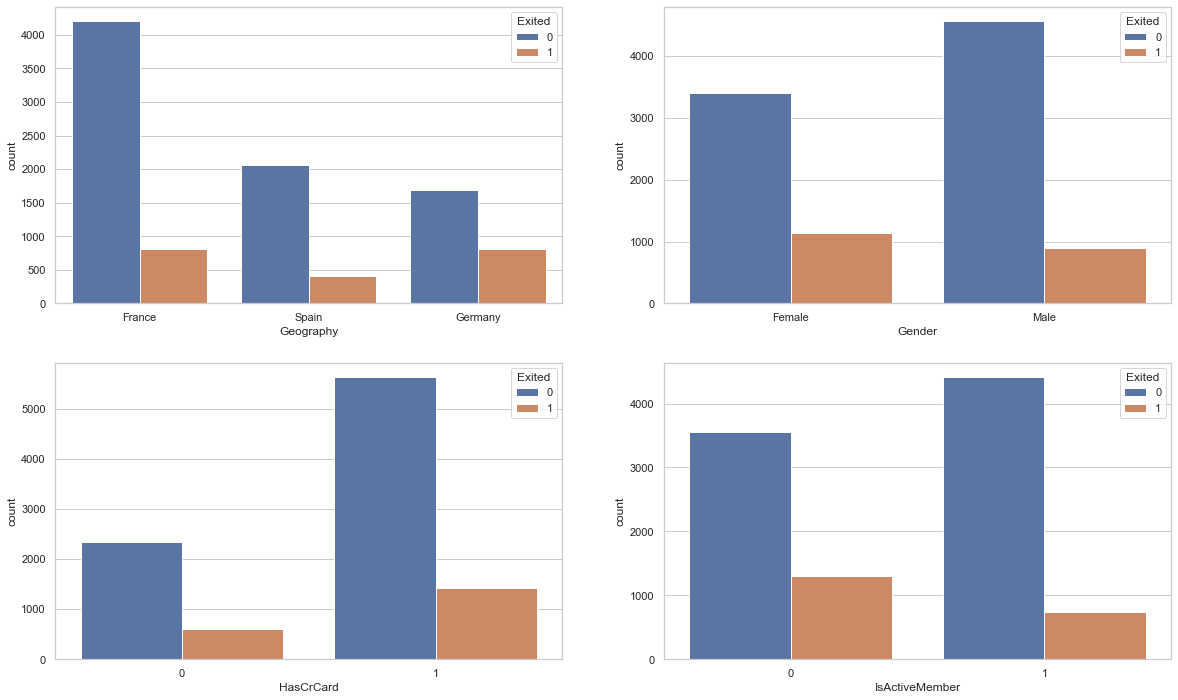

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

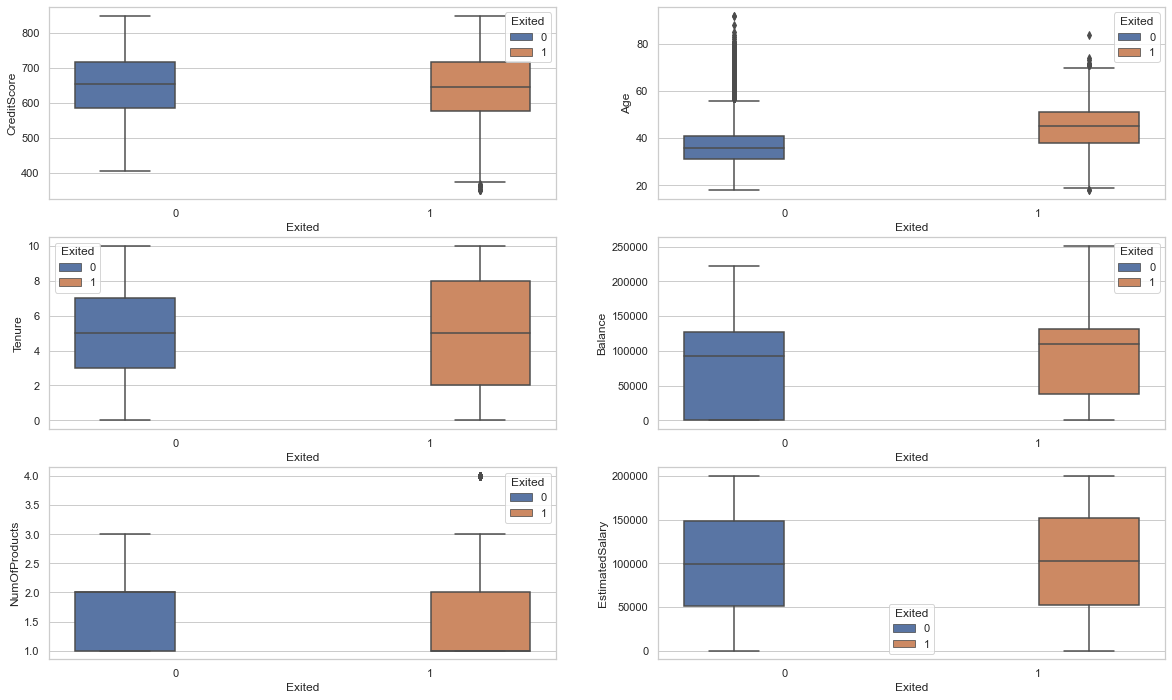

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1])

<AxesSubplot:>

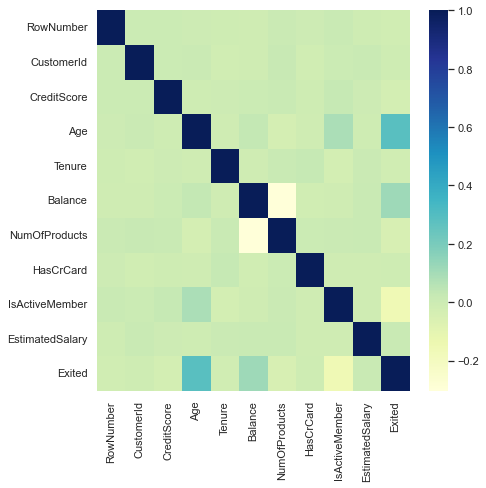

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap="YlGnBu")

### there is colleration between balance and number of products
### Age is making colleration between it and exited
### there is colleration between isActive member and exited
### there is no colleration between CustomerId and Exited
### there is no colleration between HasCrCard and Exited

# Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [16]:
df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)
df.drop("RowNumber", axis=1, inplace=True)


In [17]:
#add new feature balanceandsalaryratio
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary

In [18]:
df = pd.get_dummies(data = df ,columns=['Gender', 'Geography'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.0000,1,1,1,101348.8800,1,0.0000,1,0,1,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,0.7447,1,0,0,0,1
2,502,42,8,159660.8000,3,1,0,113931.5700,1,1.4014,1,0,1,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0.0000,1,0,1,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,1.5871,1,0,0,0,1


In [19]:
df.rename(columns={'Gender_Female':'Female',
                     'Gender_Male':'Male',
                     'Geography_France': 'France',
                     'Geography_Germany' : 'Germany',
                     'Geography_Spain':'Spain'}, inplace = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,Female,Male,France,Germany,Spain
0,619,42,2,0.0000,1,1,1,101348.8800,1,0.0000,1,0,1,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,0.7447,1,0,0,0,1
2,502,42,8,159660.8000,3,1,0,113931.5700,1,1.4014,1,0,1,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0.0000,1,0,1,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,1.5871,1,0,0,0,1


In [20]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [102]:
X.shape

(10000, 14)

In [21]:
from sklearn.model_selection import train_test_split 

#split tha data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 101)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 6000 samples.
Testing set has 4000 samples.


In [22]:
from sklearn.preprocessing import MinMaxScaler 

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(X_train.shape)
print(X_test.shape)
seed=101

(6000, 14)
(4000, 14)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [32]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])

In [33]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(14, 16) dtype=float32, numpy=
 array([[-0.02368268, -0.21076126, -0.43550095, -0.23546338, -0.00323167,
          0.25461733,  0.43394315,  0.1841225 , -0.10807028, -0.25035685,
          0.19117302,  0.3401575 ,  0.32196456, -0.09218448, -0.03817663,
         -0.18863967],
        [ 0.36373496,  0.1143173 ,  0.07769626, -0.34914997, -0.08244148,
          0.30898952,  0.4150179 , -0.28185093, -0.10338575,  0.05935174,
          0.21401   ,  0.3489908 , -0.42461208,  0.09287465,  0.37688768,
          0.05346888],
        [ 0.13727021,  0.0595333 ,  0.4410377 ,  0.24883807, -0.28347406,
          0.03852549, -0.4407947 ,  0.21283168, -0.4089391 , -0.11151838,
         -0.11881596,  0.36236846,  0.11436599,  0.42841566, -0.22871333,
          0.28439498],
        [ 0.28293592, -0.04500771, -0.21578197, -0.24447247, -0.03150058,
         -0.35068622,  0.06210381,  0.01278454, -0.07601163,  0.059448  ,
          0.02111709, -0.31491846, -0.3600637 ,

In [34]:
Epochs = 1000
Batch=150

In [35]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          )

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 2s 329us/sample - loss: 1.1360 - Recall: 1.0000 - val_loss: 0.8967 - val_Recall: 1.0000
Epoch 2/1000
5100/5100 [==============================] - 0s 22us/sample - loss: 0.7605 - Recall: 0.7298 - val_loss: 0.6589 - val_Recall: 0.2284
Epoch 3/1000
5100/5100 [==============================] - 0s 23us/sample - loss: 0.6093 - Recall: 0.0424 - val_loss: 0.5470 - val_Recall: 0.0000e+00
Epoch 4/1000
5100/5100 [==============================] - 0s 23us/sample - loss: 0.5339 - Recall: 0.0000e+00 - val_loss: 0.4867 - val_Recall: 0.0000e+00
Epoch 5/1000
5100/5100 [==============================] - 0s 22us/sample - loss: 0.4969 - Recall: 0.0094 - val_loss: 0.4598 - val_Recall: 0.0370
Epoch 6/1000
5100/5100 [==============================] - 0s 26us/sample - loss: 0.4787 - Recall: 0.0574 - val_loss: 0.4493 - val_Recall: 0.1049
Epoch 7/1000
5100/5100 [==============================] - 0s 26us/samp

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [37]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.head()

,loss,Recall,val_loss,val_Recall
0,1.1360,1.0000,0.8967,1.0000
1,0.7605,0.7298,0.6589,0.2284
2,0.6093,0.0424,0.5470,0.0000
3,0.5339,0.0000,0.4867,0.0000
4,0.4969,0.0094,0.4598,0.0370


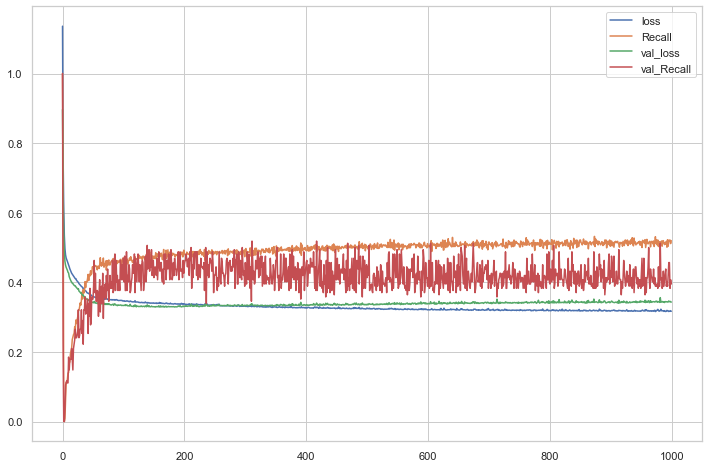

In [38]:
loss_df.plot();

In [39]:
model.evaluate(X_test, y_test, verbose=0)

[0.34137271815538406, 0.50430506]

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
# 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3041  146]
 [ 403  410]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3187
           1       0.74      0.50      0.60       813

    accuracy                           0.86      4000
   macro avg       0.81      0.73      0.76      4000
weighted avg       0.85      0.86      0.85      4000



In [41]:
eval_metric(y_test, y_pred)

r2_score: 0.15246093157511453 
mae: 0.13725 
mse: 0.13725 
rmse: 0.3704726710568541


In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

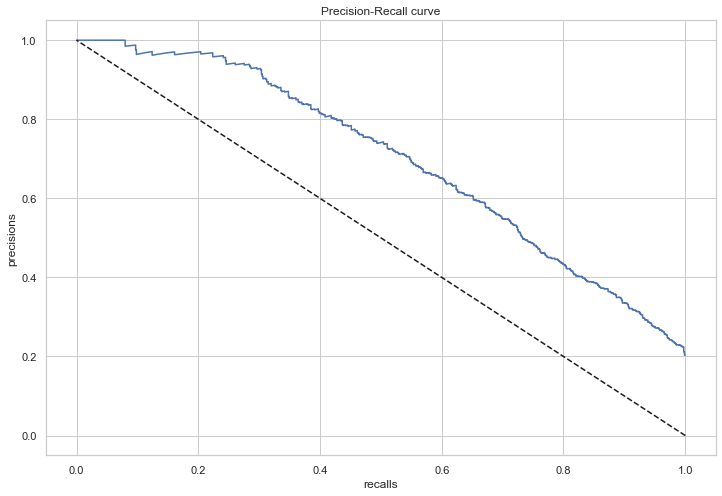

In [43]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1, 0], [0, 1], 'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gosterir

In [45]:
average_precision_score(y_test, y_pred_proba)

0.6998413709953858

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [46]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])

In [47]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights


{0: 0.628140703517588, 1: 2.450980392156863}

In [48]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          class_weight=class_weights)

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 1s 251us/sample - loss: 0.8432 - Recall: 1.0000 - val_loss: 0.7260 - val_Recall: 1.0000
Epoch 2/1000
5100/5100 [==============================] - 0s 24us/sample - loss: 0.7085 - Recall: 0.9774 - val_loss: 0.6619 - val_Recall: 0.9321
Epoch 3/1000
5100/5100 [==============================] - 0s 24us/sample - loss: 0.6688 - Recall: 0.8192 - val_loss: 0.6374 - val_Recall: 0.7160
Epoch 4/1000
5100/5100 [==============================] - 0s 23us/sample - loss: 0.6466 - Recall: 0.6478 - val_loss: 0.6214 - val_Recall: 0.5617
Epoch 5/1000
5100/5100 [==============================] - 0s 23us/sample - loss: 0.6323 - Recall: 0.6196 - val_loss: 0.6106 - val_Recall: 0.5556
Epoch 6/1000
5100/5100 [==============================] - 0s 25us/sample - loss: 0.6208 - Recall: 0.6460 - val_loss: 0.6024 - val_Recall: 0.5926
Epoch 7/1000
5100/5100 [==============================] - 0s 24us/sample - loss: 0

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

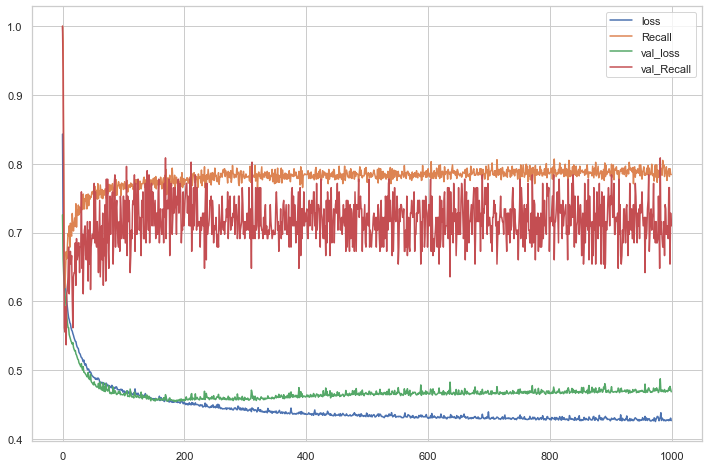

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2549  638]
 [ 198  615]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3187
           1       0.49      0.76      0.60       813

    accuracy                           0.79      4000
   macro avg       0.71      0.78      0.73      4000
weighted avg       0.84      0.79      0.81      4000



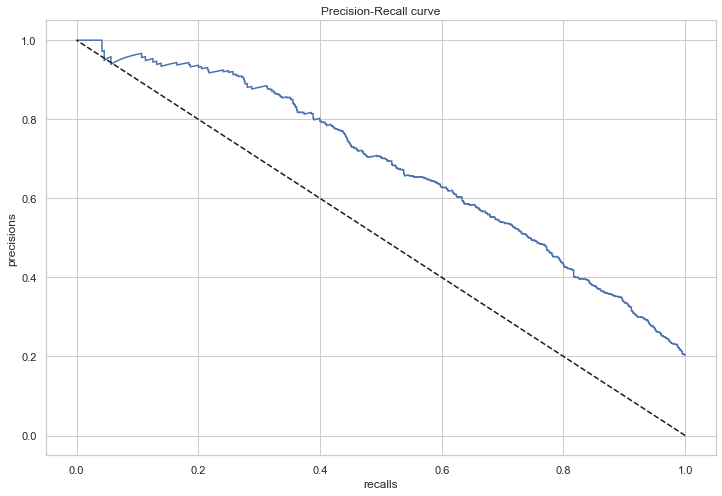

In [52]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [53]:
average_precision_score(y_test, y_pred_proba) 

0.681205088536211

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.003)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [56]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [57]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 1s 287us/sample - loss: 0.7447 - Recall: 0.8531 - val_loss: 0.6386 - val_Recall: 0.6049
Epoch 2/1000
5100/5100 [==============================] - 0s 47us/sample - loss: 0.6479 - Recall: 0.6309 - val_loss: 0.6187 - val_Recall: 0.6111
Epoch 3/1000
5100/5100 [==============================] - 0s 24us/sample - loss: 0.6224 - Recall: 0.6648 - val_loss: 0.5970 - val_Recall: 0.6481
Epoch 4/1000
5100/5100 [==============================] - 0s 25us/sample - loss: 0.6003 - Recall: 0.6855 - val_loss: 0.5684 - val_Recall: 0.6420
Epoch 5/1000
5100/5100 [==============================] - 0s 26us/sample - loss: 0.5832 - Recall: 0.6864 - val_loss: 0.5688 - val_Recall: 0.7407
Epoch 6/1000
5100/5100 [==============================] - 0s 25us/sample - loss: 0.5786 - Recall: 0.6911 - val_loss: 0.5501 - val_Recall: 0.6790
Epoch 7/1000
5100/5100 [==============================] - 0s 26us/sample - loss: 0

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


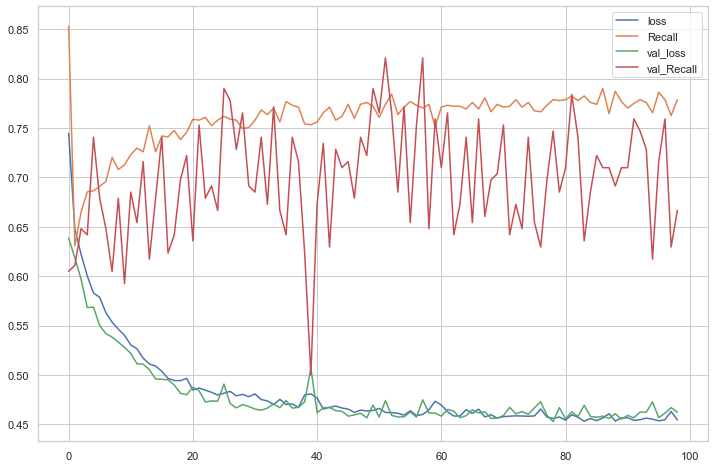

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [60]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2628  559]
 [ 216  597]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3187
           1       0.52      0.73      0.61       813

    accuracy                           0.81      4000
   macro avg       0.72      0.78      0.74      4000
weighted avg       0.84      0.81      0.82      4000



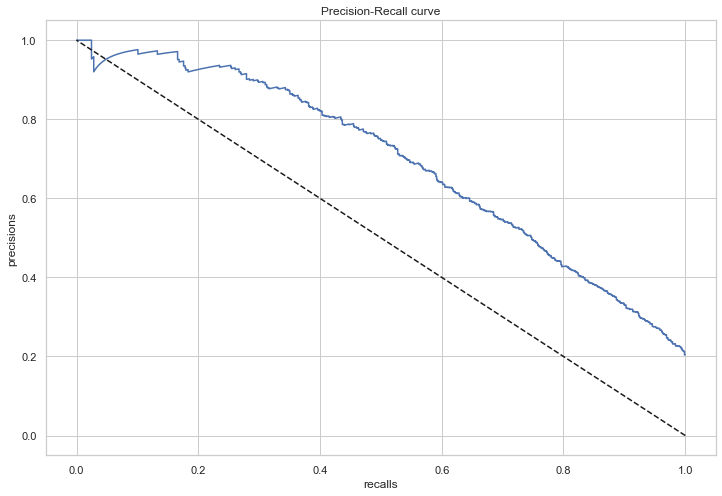

In [61]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [62]:
average_precision_score(y_test, y_pred_proba) 

0.6932485646848947

### Add Dropout Layer

In [63]:
from tensorflow.keras.layers import Dropout

In [64]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [65]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [66]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 2s 321us/sample - loss: 1.1906 - Recall: 0.9105 - val_loss: 0.8997 - val_Recall: 1.0000
Epoch 2/1000
5100/5100 [==============================] - 0s 32us/sample - loss: 0.7958 - Recall: 0.7420 - val_loss: 0.6710 - val_Recall: 0.3025
Epoch 3/1000
5100/5100 [==============================] - 0s 28us/sample - loss: 0.6484 - Recall: 0.2307 - val_loss: 0.5732 - val_Recall: 0.0000e+00
Epoch 4/1000
5100/5100 [==============================] - 0s 28us/sample - loss: 0.5777 - Recall: 0.0838 - val_loss: 0.5124 - val_Recall: 0.0000e+00
Epoch 5/1000
5100/5100 [==============================] - 0s 28us/sample - loss: 0.5498 - Recall: 0.0433 - val_loss: 0.4875 - val_Recall: 0.0000e+00
Epoch 6/1000
5100/5100 [==============================] - 0s 31us/sample - loss: 0.5391 - Recall: 0.0348 - val_loss: 0.4768 - val_Recall: 0.0000e+00
Epoch 7/1000
5100/5100 [==============================] - 0s 28us/

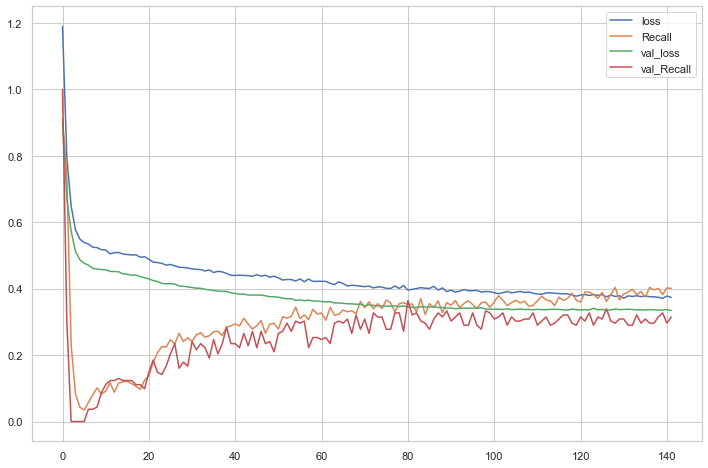

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [68]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.345454675078392
recall :  0.38253382


In [69]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3117   70]
 [ 502  311]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3187
           1       0.82      0.38      0.52       813

    accuracy                           0.86      4000
   macro avg       0.84      0.68      0.72      4000
weighted avg       0.85      0.86      0.84      4000



#### Monitor the "val_loss" as metric

In [70]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [71]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [72]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 1s 257us/sample - loss: 1.2178 - Recall: 0.8927 - val_loss: 0.9013 - val_Recall: 1.0000
Epoch 2/1000
5100/5100 [==============================] - 0s 27us/sample - loss: 0.8195 - Recall: 0.7373 - val_loss: 0.6839 - val_Recall: 0.4259
Epoch 3/1000
5100/5100 [==============================] - 0s 27us/sample - loss: 0.6808 - Recall: 0.3625 - val_loss: 0.5984 - val_Recall: 0.0062
Epoch 4/1000
5100/5100 [==============================] - 0s 31us/sample - loss: 0.6159 - Recall: 0.1243 - val_loss: 0.5429 - val_Recall: 0.0000e+00
Epoch 5/1000
5100/5100 [==============================] - 0s 33us/sample - loss: 0.5764 - Recall: 0.0800 - val_loss: 0.5060 - val_Recall: 0.0000e+00
Epoch 6/1000
5100/5100 [==============================] - 0s 32us/sample - loss: 0.5695 - Recall: 0.0565 - val_loss: 0.4912 - val_Recall: 0.0000e+00
Epoch 7/1000
5100/5100 [==============================] - 0s 31us/samp

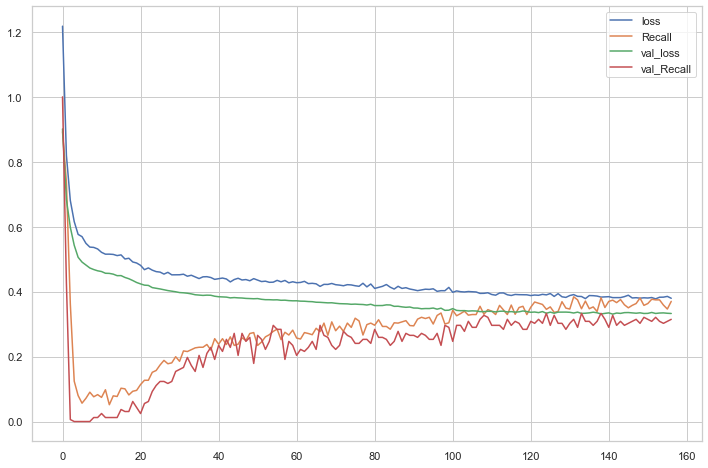

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [74]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3488825543522835
recall :  0.36654365


In [76]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3127   60]
 [ 515  298]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3187
           1       0.83      0.37      0.51       813

    accuracy                           0.86      4000
   macro avg       0.85      0.67      0.71      4000
weighted avg       0.85      0.86      0.83      4000



#### Monitor the "val_recall" as metric

In [82]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [83]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [84]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 2s 299us/sample - loss: 1.2178 - Recall: 0.8927 - val_loss: 0.9013 - val_Recall: 1.0000
Epoch 2/1000
5100/5100 [==============================] - 0s 50us/sample - loss: 0.8195 - Recall: 0.7373 - val_loss: 0.6839 - val_Recall: 0.4259
Epoch 3/1000
5100/5100 [==============================] - 0s 63us/sample - loss: 0.6808 - Recall: 0.3625 - val_loss: 0.5984 - val_Recall: 0.0062
Epoch 4/1000
5100/5100 [==============================] - 0s 51us/sample - loss: 0.6159 - Recall: 0.1243 - val_loss: 0.5429 - val_Recall: 0.0000e+00
Epoch 5/1000
5100/5100 [==============================] - 0s 65us/sample - loss: 0.5764 - Recall: 0.0800 - val_loss: 0.5060 - val_Recall: 0.0000e+00
Epoch 6/1000
5100/5100 [==============================] - 0s 59us/sample - loss: 0.5695 - Recall: 0.0565 - val_loss: 0.4912 - val_Recall: 0.0000e+00
Epoch 7/1000
5100/5100 [==============================] - 1s 101us/sam

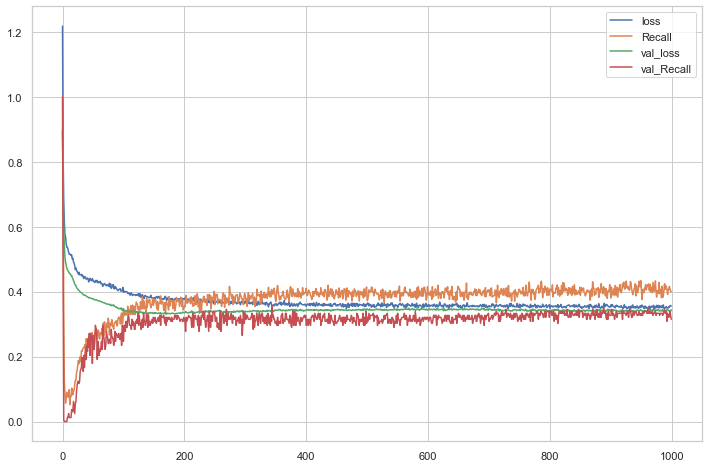

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();


## GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [ ]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [ ]:
class_weights

In [ ]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values('rank_test_score')
grid_result

In [ ]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [86]:
scaler = MinMaxScaler().fit(X)

In [87]:
import pickle
pickle.dump(scaler, open("scaler_churn_recall", 'wb'))

In [88]:
X_scaled = scaler.transform(X)

In [89]:
tf.random.set_seed(seed)
final_model = Sequential()
final_model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
final_model.add(Dense(8, activation='relu'))
final_model.add(Dense(4, activation='relu'))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['Recall'])

In [90]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.628140703517588, 1: 2.450980392156863}

In [91]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [92]:
final_model.fit(x=X_train,
                y=y_train,
                validation_split=0.15,
                batch_size=Batch,
                epochs=Epochs,
                verbose=1,
                callbacks=[early_stop],
                class_weight=class_weights)

Train on 5100 samples, validate on 900 samples
Epoch 1/1000
5100/5100 [==============================] - 3s 538us/sample - loss: 0.8432 - Recall: 1.0000 - val_loss: 0.7260 - val_Recall: 1.0000
Epoch 2/1000
5100/5100 [==============================] - 0s 60us/sample - loss: 0.7085 - Recall: 0.9774 - val_loss: 0.6619 - val_Recall: 0.9321
Epoch 3/1000
5100/5100 [==============================] - 0s 73us/sample - loss: 0.6688 - Recall: 0.8192 - val_loss: 0.6374 - val_Recall: 0.7160
Epoch 4/1000
5100/5100 [==============================] - 0s 72us/sample - loss: 0.6466 - Recall: 0.6478 - val_loss: 0.6214 - val_Recall: 0.5617
Epoch 5/1000
5100/5100 [==============================] - 0s 77us/sample - loss: 0.6323 - Recall: 0.6196 - val_loss: 0.6106 - val_Recall: 0.5556
Epoch 6/1000
5100/5100 [==============================] - 0s 47us/sample - loss: 0.6208 - Recall: 0.6460 - val_loss: 0.6024 - val_Recall: 0.5926
Epoch 7/1000
5100/5100 [==============================] - 0s 37us/sample - loss: 0

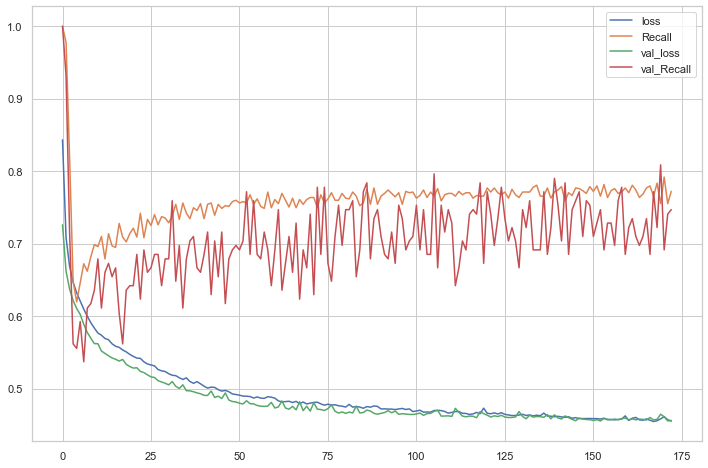

In [93]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot();

In [94]:
loss, recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.47213613975048063
recall :  0.76137763


In [95]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2484  703]
 [ 194  619]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      3187
           1       0.47      0.76      0.58       813

    accuracy                           0.78      4000
   macro avg       0.70      0.77      0.71      4000
weighted avg       0.83      0.78      0.79      4000



In [96]:
final_model.save('model_churn_recall.h5')

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model_exited = load_model('model_churn_recall.h5')

In [99]:
scaler_fake_churn = pickle.load(open("scaler_churn_recall", "rb"))

## Prediction

In [103]:
sample = df.sample(n=20, random_state=101).iloc[0:20, :14]
sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,Female,Male,France,Germany
6676,619,52,8,0.0000,2,1,1,123242.1100,0,0.0000,0,1,0,0
6421,616,23,8,73112.9500,1,1,1,62733.0500,0,1.1655,0,1,1,0
9834,516,46,6,62212.2900,1,0,1,171681.8600,1,0.3624,1,0,1,0
8492,494,28,9,114731.7600,2,0,1,79479.7400,0,1.4435,0,1,1,0
9982,655,46,7,137145.1200,1,1,0,115146.4000,1,1.1911,1,0,0,1
8844,695,35,7,0.0000,2,1,0,160387.9800,0,0.0000,0,1,0,0
7247,582,40,3,110150.4300,1,1,1,191757.6500,1,0.5744,1,0,0,1
5862,682,40,4,0.0000,2,1,1,140745.9100,0,0.0000,0,1,1,0
3662,632,28,5,118890.8100,1,0,1,145157.9700,0,0.8190,1,0,1,0
3457,657,36,8,188241.0500,2,0,0,183058.5100,1,1.0283,0,1,0,0


In [104]:
sample_scaled = scaler_fake_churn.transform(sample) # transform

In [105]:
prediction = pd.DataFrame(model_exited.predict(sample_scaled) > 0.5, columns=['prediction']).astype("float64")
prediction

,prediction
0,0.0000
1,0.0000
2,1.0000
3,0.0000
4,0.0000
5,1.0000
6,0.0000
7,0.0000
8,0.0000
9,0.0000


In [106]:
actual = pd.DataFrame(df.sample(n=20, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

,actual
6676,0.0000
6421,0.0000
9834,1.0000
8492,0.0000
9982,1.0000
8844,0.0000
7247,1.0000
5862,0.0000
3662,0.0000
3457,1.0000


In [107]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0.0000,0.0000
6421,0.0000,0.0000
9834,1.0000,1.0000
8492,0.0000,0.0000
9982,1.0000,0.0000
8844,0.0000,1.0000
7247,1.0000,0.0000
5862,0.0000,0.0000
3662,0.0000,0.0000
3457,1.0000,0.0000


In [108]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.0000,0.0000,TRUE
6421,0.0000,0.0000,TRUE
9834,1.0000,1.0000,TRUE
8492,0.0000,0.0000,TRUE
9982,1.0000,0.0000,FALSE
8844,0.0000,1.0000,FALSE
7247,1.0000,0.0000,FALSE
5862,0.0000,0.0000,TRUE
3662,0.0000,0.0000,TRUE
3457,1.0000,0.0000,FALSE
